### Exploratory Data Analysis of Zomato

#### The basic idea is analyzing the Buisness Problem of Zomato  to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more.

### Data Loading and Libraries

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Avoid warning message
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read Dataset
zomato_main = pd.read_csv('zomato.csv')
zomato_main.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Data Cleaning

In [5]:
#The hotel URL 
print(zomato_main['url'][0])

https://www.zomato.com/bangalore/jalsa-banashankari?context=eyJzZSI6eyJlIjpbNTg2OTQsIjE4Mzc1NDc0IiwiNTkwOTAiLCIxODM4Mjk0NCIsIjE4MjI0Njc2IiwiNTkyODkiLCIxODM3MzM4NiJdLCJ0IjoiUmVzdGF1cmFudHMgaW4gQmFuYXNoYW5rYXJpIHNlcnZpbmcgQnVmZmV0In19


In [8]:
# Hotel Phone Numbers
print(zomato_main['phone'])

0          080 42297555\r\n+91 9743772233
1                            080 41714161
2                          +91 9663487993
3                          +91 9620009302
4        +91 8026612447\r\n+91 9901210005
                      ...                
995    +91 8026430260\r\r\n+91 9902495622
996                          080 71967536
997    +91 9513477574\r\r\n+91 9901842605
998    +91 9108615502\r\r\n+91 9108615503
999    +91 9663197947\r\r\n+91 9986692090
Name: phone, Length: 1000, dtype: object


In [9]:
# Check Dish liked
print(zomato_main['dish_liked'])

0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2      Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                            Masala Dosa
4                                    Panipuri, Gol Gappe
                             ...                        
995                                                  NaN
996     Chicken Biryani, Hyderabadi Biryani, Dum Biryani
997    Kalmi Kabab, Hyderabadi Dum Biryani, Vegetable...
998                                                  NaN
999                                    Momos, Oreo Shake
Name: dish_liked, Length: 1000, dtype: object


In [10]:
# Check address and Location, address column contains location as well
zomato_main[['address','location']]

,address,location
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Basavanagudi
...,...,...
995,"Near Aikya Apartment, Chikkammanahalli Road, S...",Bannerghatta Road
996,"935, Sri Arcade, 1st Floor, 16th Main Road, Ne...",BTM
997,"915, 24th Main Road, 2nd Phase, Mayura Circle,...",JP Nagar
998,"44, 3rd Cross, Marenahalli, 2nd Phase, JP Naga...",JP Nagar


In [11]:
zomato_main[['location', 'listed_in(city)']]

,location,listed_in(city)
0,Banashankari,Banashankari
1,Banashankari,Banashankari
2,Banashankari,Banashankari
3,Banashankari,Banashankari
4,Basavanagudi,Banashankari
...,...,...
995,Bannerghatta Road,Bannerghatta Road
996,BTM,Bannerghatta Road
997,JP Nagar,Bannerghatta Road
998,JP Nagar,Bannerghatta Road


In [12]:
# The columns 'url', 'dish_liked', 'phone' is not important
# Changes are saved in zomato_main because of 'inplace=True'
zomato = zomato_main.drop(['url', 'dish_liked', 'phone'], axis=1)

In [13]:
# The information about he dataset, data type, missing values
print(zomato.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   1000 non-null   int64 
 1   address                      1000 non-null   object
 2   name                         1000 non-null   object
 3   online_order                 1000 non-null   object
 4   book_table                   1000 non-null   object
 5   rate                         900 non-null    object
 6   votes                        1000 non-null   int64 
 7   location                     1000 non-null   object
 8   rest_type                    999 non-null    object
 9   cuisines                     997 non-null    object
 10  approx_cost(for two people)  1000 non-null   object
 11  reviews_list                 1000 non-null   object
 12  menu_item                    1000 non-null   object
 13  listed_in(type)              1000 

In [14]:
# find total Null values in the data set
print(zomato.isna().sum())

Unnamed: 0                       0
address                          0
name                             0
online_order                     0
book_table                       0
rate                           100
votes                            0
location                         0
rest_type                        1
cuisines                         3
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64


In [15]:
# find the duplicate values in the dataset
print(zomato.duplicated().sum())

0


In [16]:
#drop the duplicated rows from dataset
zomato.drop_duplicates(inplace=True)

In [17]:
# drop null (NaN) values
# if any value is null from column or row
# default value od axis is 0, it will drop the 
# rows consisting any value as NaN

zomato.dropna(how='any', inplace=True)

In [18]:
# Read the column
print(zomato.columns)

Index(['Unnamed: 0', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [19]:
#Give proper names to the column
zomato.rename(columns={'listed_in(type)':'type', 
                       'approx_cost(for two people)': 'cost', 
                       'listed_in(city)':'city'}, 
              inplace=True)
print(zomato.columns)

Index(['Unnamed: 0', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')


In [20]:
# looking at the information of columns
print(zomato.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 998
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    898 non-null    int64 
 1   address       898 non-null    object
 2   name          898 non-null    object
 3   online_order  898 non-null    object
 4   book_table    898 non-null    object
 5   rate          898 non-null    object
 6   votes         898 non-null    int64 
 7   location      898 non-null    object
 8   rest_type     898 non-null    object
 9   cuisines      898 non-null    object
 10  cost          898 non-null    object
 11  reviews_list  898 non-null    object
 12  menu_item     898 non-null    object
 13  type          898 non-null    object
 14  city          898 non-null    object
dtypes: int64(2), object(13)
memory usage: 112.2+ KB
None


In [18]:
#Transformations to some columns

#Change the cost to string
zomato['cost'] = zomato['cost'].astype(str)

In [21]:
#unique values from cost column
print(zomato['cost'].unique())

['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600']


In [22]:
# Remove ',' from cost column values
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',',''))

In [23]:
#Dtype of cost column is str, convert to float
zomato['cost'] = zomato['cost'].astype(float)
print(zomato.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 898 entries, 0 to 998
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    898 non-null    int64  
 1   address       898 non-null    object 
 2   name          898 non-null    object 
 3   online_order  898 non-null    object 
 4   book_table    898 non-null    object 
 5   rate          898 non-null    object 
 6   votes         898 non-null    int64  
 7   location      898 non-null    object 
 8   rest_type     898 non-null    object 
 9   cuisines      898 non-null    object 
 10  cost          898 non-null    float64
 11  reviews_list  898 non-null    object 
 12  menu_item     898 non-null    object 
 13  type          898 non-null    object 
 14  city          898 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB
None


In [24]:
# Read unique values from rate column
print(zomato['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5'
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5']


In [25]:
#Replace'/5' with ''
zomato['rate'] = zomato['rate'].apply(lambda x: x.replace('/5', ''))

In [26]:
# Remove unwanted rows 'NEW', '-'
zomato.loc[(zomato.rate == '-') | (zomato.rate == 'NEW')].count() #2262 rows
zomato = zomato.loc[(zomato.rate != 'NEW')]
zomato = zomato.loc[(zomato.rate != '-')]
zomato['rate'] = zomato['rate'].astype(float) #Convert Dtype to float
print(zomato['rate'].head())

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64


In [27]:
#Reset Index
zomato = zomato.reset_index(drop=True)
print(zomato.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    851 non-null    int64  
 1   address       851 non-null    object 
 2   name          851 non-null    object 
 3   online_order  851 non-null    object 
 4   book_table    851 non-null    object 
 5   rate          851 non-null    float64
 6   votes         851 non-null    int64  
 7   location      851 non-null    object 
 8   rest_type     851 non-null    object 
 9   cuisines      851 non-null    object 
 10  cost          851 non-null    float64
 11  reviews_list  851 non-null    object 
 12  menu_item     851 non-null    object 
 13  type          851 non-null    object 
 14  city          851 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 99.9+ KB
None


In [28]:
# Adjust Column Name
zomato['name'] = zomato['name'].apply(lambda x: x.title()) 
#Make hotel Name in Title Case

In [29]:
# Replace 'Yes' with True and 'No' with 'False' in column online order
zomato['online_order'].unique()
zomato['online_order'] = zomato['online_order'].replace(
    {'Yes':True, 'No':False})

In [30]:
# Replace 'Yes' with True and 'No' with 'False' in column Book table
zomato['book_table'].unique()
zomato['book_table'] = zomato['book_table'].replace(
    {'Yes':True, 'No':False})

In [31]:
# Check info
print(zomato.info()) #Dtype converted to bool for 'online_order' and 'book_table'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851 entries, 0 to 850
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    851 non-null    int64  
 1   address       851 non-null    object 
 2   name          851 non-null    object 
 3   online_order  851 non-null    bool   
 4   book_table    851 non-null    bool   
 5   rate          851 non-null    float64
 6   votes         851 non-null    int64  
 7   location      851 non-null    object 
 8   rest_type     851 non-null    object 
 9   cuisines      851 non-null    object 
 10  cost          851 non-null    float64
 11  reviews_list  851 non-null    object 
 12  menu_item     851 non-null    object 
 13  type          851 non-null    object 
 14  city          851 non-null    object 
dtypes: bool(2), float64(2), int64(2), object(9)
memory usage: 88.2+ KB
None


In [32]:
print(zomato.cost.unique())

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  900.  200.  750.
  150.  850.  100. 1200.  350.  250.  950. 1000. 1500. 1300.  199. 1100.
 1600.]


In [33]:
# Encode the variables
def encode(zom):
    for col in zom.columns[~zom.columns.isin(['rate', 'cost', 'votes'])]:
        zom[col] = zom[col].factorize()[0]
    return zom

In [34]:
zomato_encode = encode(zomato.copy())

In [35]:
zomato_encode.head()

,Unnamed: 0,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0


<AxesSubplot:>

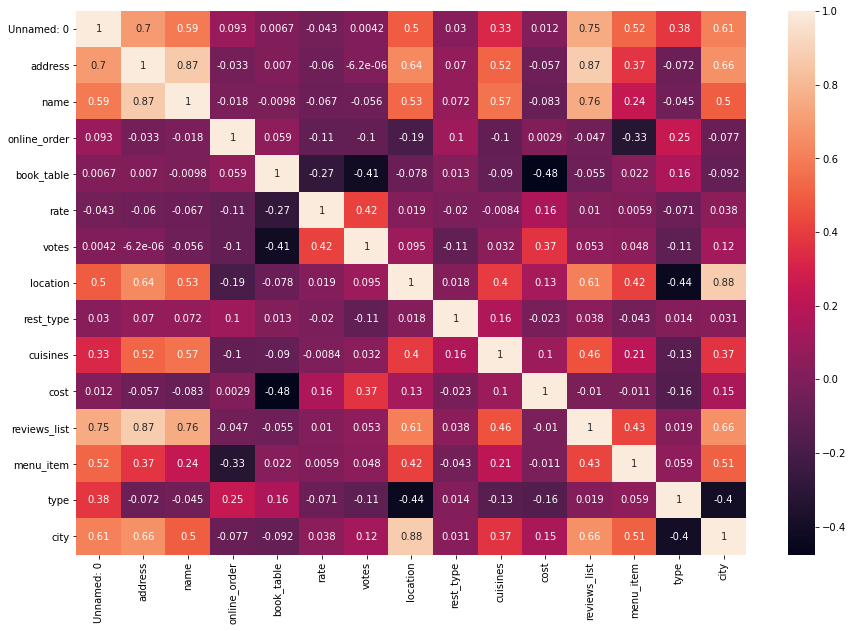

In [36]:
# Find the correlation
corr = zomato_encode.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)
#The correlation between Name and address is 0.68 and 
#location and address is 0.61 (Not big concern)

### Data Visualization

Text(0.5, 1.0, 'Restaurants Delivering Online or Not')

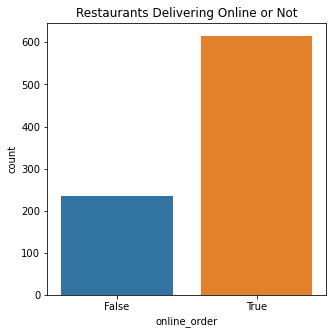

In [37]:
# Restaurants is delivering online or not
plt.figure(figsize=(5,5))
sns.countplot(zomato['online_order'])
plt.title('Restaurants Delivering Online or Not')

Text(0.5, 1.0, 'Restaurants allowing Table Booking or Not')

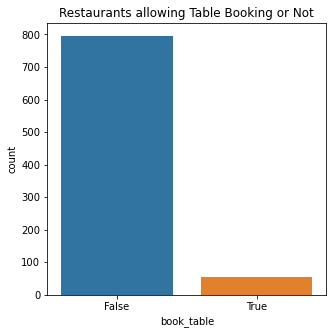

In [38]:
#Restaurants allowing Table Booking or Not
plt.figure(figsize=(5,5))
sns.countplot(zomato['book_table'])
plt.title('Restaurants allowing Table Booking or Not')

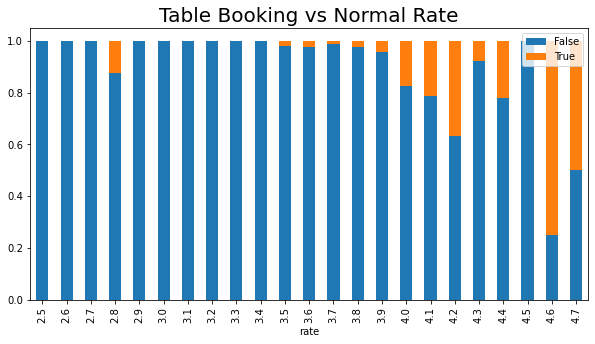

In [39]:
#able Booking vs Normal Rate
df = pd.crosstab(zomato['rate'], zomato['book_table'])
df.div(df.sum(axis=1).astype(float), axis=0).plot(kind = 'bar',
                                                  stacked = True)
plt.legend(loc = 'upper right')
plt.title('Table Booking vs Normal Rate',fontsize = 20 )
fig = plt.gcf()
fig.set_size_inches(10,5)

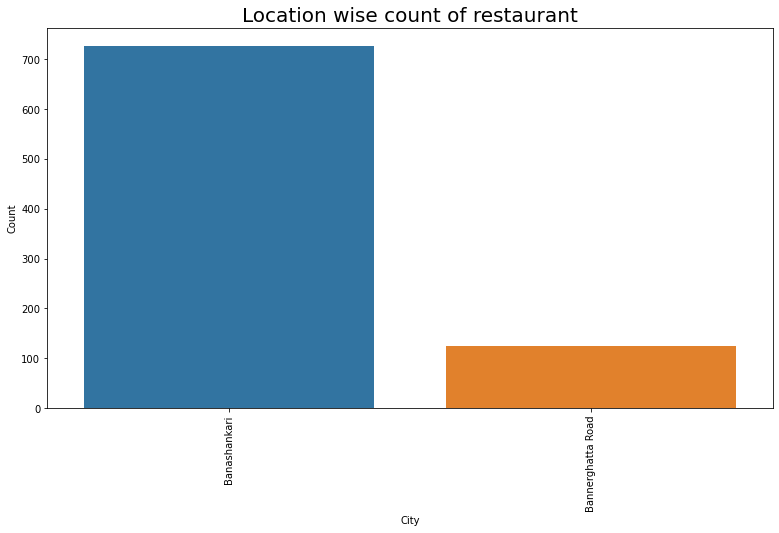

In [40]:
# Location wise count of restaurant
plt.figure(figsize=(13,7))
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(
    zomato['city']).get_xticklabels(), rotation=90)
plt.title('Location wise count of restaurant', fontsize = 20)
plt.xlabel('City', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

Text(0, 0.5, 'Location')

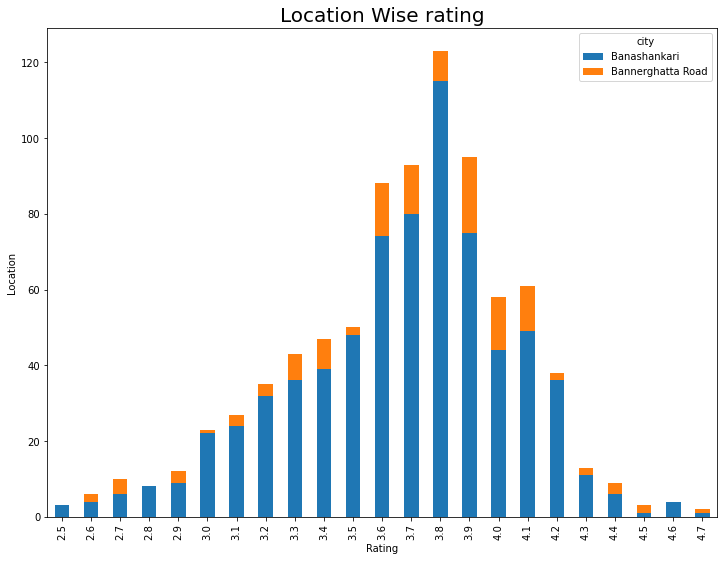

In [41]:
# Location and rating
df_loc = pd.crosstab(zomato['rate'], zomato['city'])
df_loc.plot(kind='bar',stacked=True)
x = plt.gcf()
x.set_size_inches(12,9)
plt.title('Location Wise rating', fontsize = 20)
plt.xlabel('Rating', fontsize=10)
plt.ylabel('Location', fontsize=10)

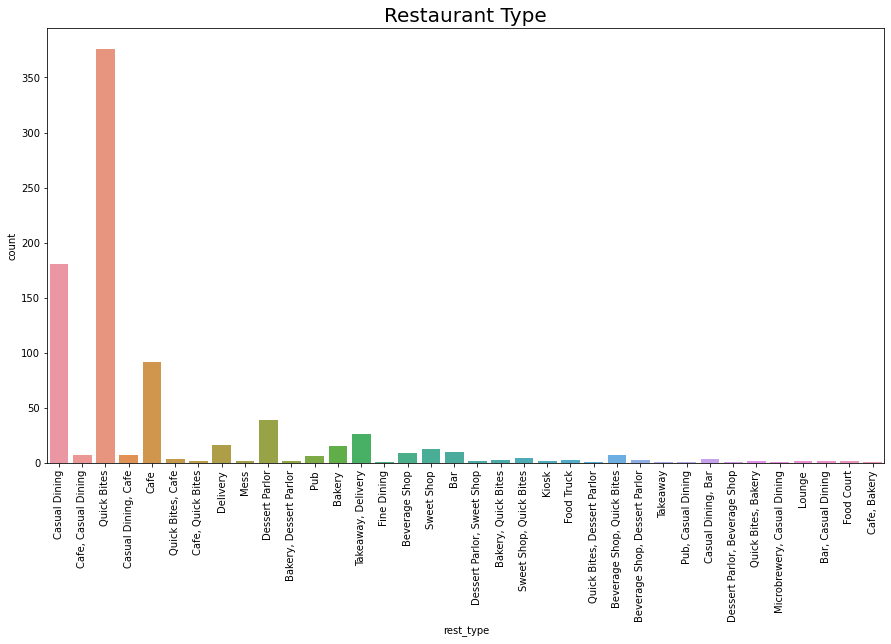

In [42]:
# Restaurant Type
plt.figure(figsize=(15,8))
sns.countplot(zomato['rest_type']).set_xticklabels(
    sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90)
plt.title('Restaurant Type', fontsize = 20)
plt.show()

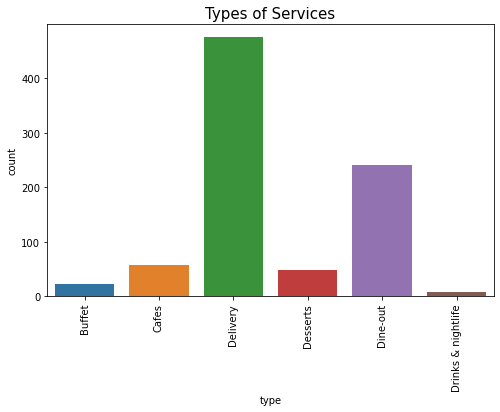

In [43]:
#Types of Services
plt.figure(figsize=(8,5))
sns.countplot(zomato['type']).set_xticklabels(
    sns.countplot(zomato['type']).get_xticklabels(), rotation=90)
plt.title('Types of Services', fontsize=15)
plt.show()

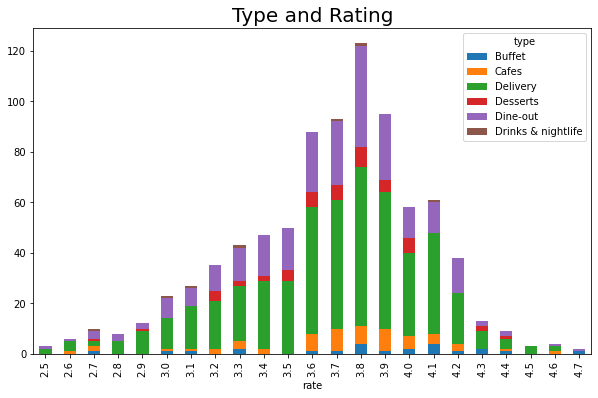

In [45]:
#Type and Rating
df_tr = pd.crosstab( zomato['rate'],zomato['type'])
df_tr.plot(kind='bar', stacked=True)
c = plt.gcf()
c.set_size_inches(10,6)
plt.title('Type and Rating', fontsize = 20)
plt.show()

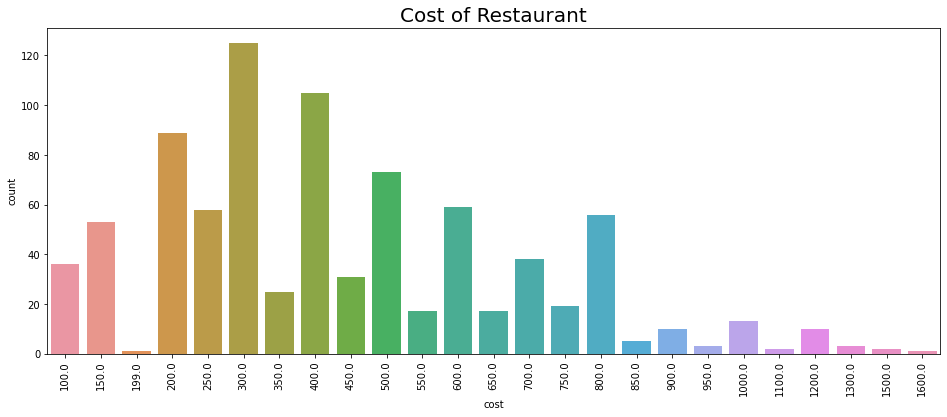

In [46]:
#Cost of Resaurant
sns.countplot(zomato['cost']).set_xticklabels(
    sns.countplot(zomato['cost']).get_xticklabels(), rotation=90)
x = plt.gcf()
x.set_size_inches(16,6)
plt.title('Cost of Restaurant', fontsize=20)
plt.show()

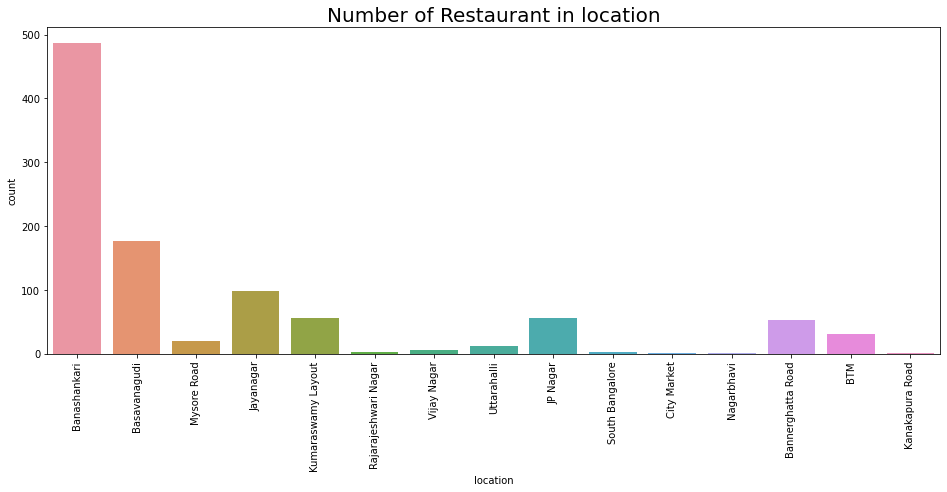

In [47]:
# Number of Restaurant in location
plt.figure(figsize=(16,6))
sns.countplot(zomato_main['location']).set_xticklabels(
    sns.countplot(zomato_main['location']).get_xticklabels(),rotation=90)
plt.title('Number of Restaurant in location', fontsize=20)
plt.show()

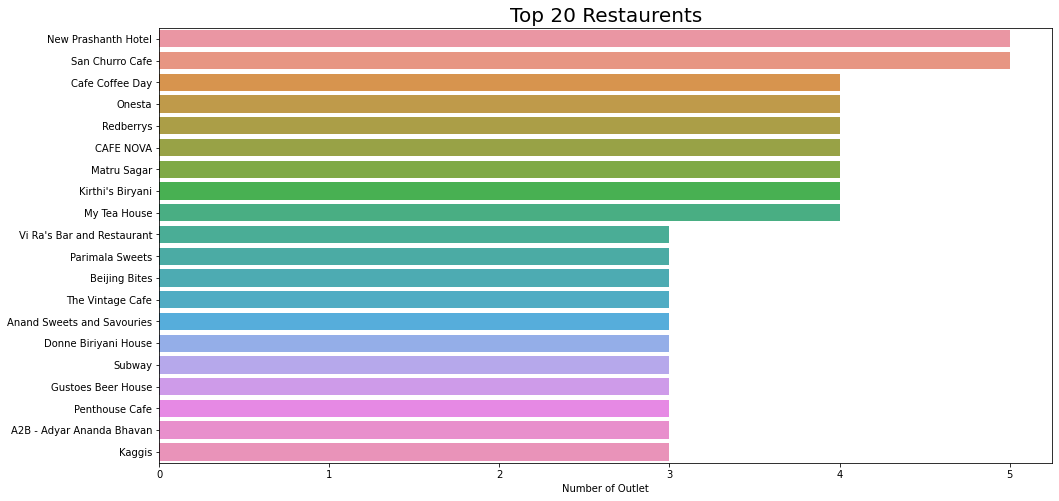

In [48]:
#Top 20 Restaurants chains 
plt.figure(figsize=(16,8))
top_20 = zomato_main['name'].value_counts()[:20]
sns.barplot(x = top_20.values, y=top_20.index)
plt.xlabel('Number of Outlet')
plt.title('Top 20 Restaurents', fontsize=20)
plt.show()